In [46]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff

In [47]:
data = pandas.read_csv('GasLift.csv', sep=",")

c:\users\212780667\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.



In [48]:
for each_column in data.columns:
    print(each_column)

Id
GasliftInjectionMeter
TimeStamp
AtmosphericTemperature
CasingPressure
Choke
CriticalGasFlowRate
DifferentialPressure
EndofTubingDepth
GasLiftValves
HeaterTreaterRollup
HeaterTreaterPressure
InjectionGasRate
InjectionTemp
IsAnnularFlow
PackerDepth
ProdGasMeterRollup
ProdGasMeterFlowRate
SeparatorRollup
SeparatorPressure
StaticPressure
Temperature
TubingID
TubingPressure
PIIntTSTicks
PIIntShapeID


In [49]:
# this didn't work
# table = ff.create_table(data)
# py.iplot(table, filename='jupyter-table1')

In [50]:
#Identify good and bad columns
list_of_good_columns = []
list_of_bad_columns = []


#Replace nulls with nan
for each_column in data.columns:
#     print(each_column, data[each_column].dtype)
    if data[each_column].dtype == 'object':
        data[each_column] = data[each_column].replace({'NULL': np.nan})

#Calculate percentages of available data
for each_column in data.columns:
    data_available = data[data[each_column].notnull()]
    percent_available = len(data_available)/float(len(data))
    print(each_column,"\t\t\t", str(round(percent_available*100,2))+"%")
    if (percent_available) > 0.1:
         list_of_good_columns.append(each_column)
    else:
         list_of_bad_columns.append(each_column)

print("")
print("Good Columns (> 10% data)")
for c in list_of_good_columns:
    print(c)

print("")
print("Bad Columns")
for c in list_of_bad_columns:
    print(c)


Id 			 100.0%
GasliftInjectionMeter 			 100.0%
TimeStamp 			 100.0%
AtmosphericTemperature 			 100.0%
CasingPressure 			 99.99%
Choke 			 86.87%
CriticalGasFlowRate 			 36.57%
DifferentialPressure 			 90.95%
EndofTubingDepth 			 23.79%
GasLiftValves 			 23.79%
HeaterTreaterRollup 			 0.0%
HeaterTreaterPressure 			 33.94%
InjectionGasRate 			 90.96%
InjectionTemp 			 91.18%
IsAnnularFlow 			 38.7%
PackerDepth 			 23.79%
ProdGasMeterRollup 			 0.0%
ProdGasMeterFlowRate 			 32.28%
SeparatorRollup 			 0.0%
SeparatorPressure 			 18.82%
StaticPressure 			 91.18%
Temperature 			 91.18%
TubingID 			 23.79%
TubingPressure 			 99.99%
PIIntTSTicks 			 100.0%
PIIntShapeID 			 100.0%

Good Columns (> 10% data)
Id
GasliftInjectionMeter
TimeStamp
AtmosphericTemperature
CasingPressure
Choke
CriticalGasFlowRate
DifferentialPressure
EndofTubingDepth
GasLiftValves
HeaterTreaterPressure
InjectionGasRate
InjectionTemp
IsAnnularFlow
PackerDepth
ProdGasMeterFlowRate
SeparatorPressure
StaticPressure
Temperatu

In [51]:
# remove bad columns
for c in list_of_bad_columns:
    del data[c]

In [52]:
for each_column in data.columns:
    print(each_column)

Id
GasliftInjectionMeter
TimeStamp
AtmosphericTemperature
CasingPressure
Choke
CriticalGasFlowRate
DifferentialPressure
EndofTubingDepth
GasLiftValves
HeaterTreaterPressure
InjectionGasRate
InjectionTemp
IsAnnularFlow
PackerDepth
ProdGasMeterFlowRate
SeparatorPressure
StaticPressure
Temperature
TubingID
TubingPressure
PIIntTSTicks
PIIntShapeID


In [53]:
data.describe()

,Id,AtmosphericTemperature,CasingPressure,Choke,CriticalGasFlowRate,DifferentialPressure,EndofTubingDepth,GasLiftValves,HeaterTreaterPressure,InjectionGasRate,InjectionTemp,PackerDepth,ProdGasMeterFlowRate,SeparatorPressure,StaticPressure,Temperature,TubingID,TubingPressure,PIIntTSTicks,PIIntShapeID
count,717680.000000,717680.000000,717605.000000,623424.000000,262477.000000,652738.000000,170706.000000,170706.000000,243545.000000,652813.000000,654412.000000,170706.000000,231640.000000,135071.000000,654412.000000,654412.000000,170706.000000,717630.000000,7.176800e+05,717680.0
mean,358840.500000,39.749075,714.023112,53.784072,595.187938,65.837580,10568.202356,9.761098,75.999806,592.050555,121.576061,8612.829558,468.542712,0.441389,779.457277,121.576061,2.386483,224.658858,6.369076e+17,0.0
std,207176.514934,22.898362,296.891768,17.834163,219.767758,49.252385,1389.321103,2.345127,20.073866,219.990943,41.131851,4102.524094,349.632053,1.845980,226.639180,41.131851,0.286322,208.804774,6.043047e+13,0.0
min,1.000000,-18.039999,-21.362631,0.000000,-218.166410,-657.851200,0.000000,0.000000,-2.563497,0.000000,-18.205412,0.000000,0.000000,0.000000,-0.616576,-18.205412,0.000000,-93.614098,6.368192e+17,0.0
25%,179420.750000,24.980000,644.693660,48.000000,502.409240,39.491854,10363.400000,8.000000,74.524361,531.618230,97.441052,9645.800000,155.465653,0.000000,681.722475,97.441052,2.441000,132.591630,6.368578e+17,0.0
50%,358840.500000,38.566477,736.247800,64.000000,551.881840,60.390350,10643.999848,11.000000,78.927612,645.740420,124.053705,10468.700000,484.908035,0.000000,779.690765,124.053705,2.441000,163.653000,6.368934e+17,0.0
75%,538260.250000,57.020000,873.578980,64.000000,623.208680,81.274948,11268.900000,11.000000,85.076942,731.070920,151.563830,10799.200000,691.547503,0.000000,898.580263,151.563830,2.441000,225.070600,6.369598e+17,0.0
max,717680.000000,97.365112,2645.151400,64.000000,2623.031500,904.438290,11712.200000,12.000000,299.999480,2583.424800,1599.423000,11485.600000,3464.202400,11.694669,1690.098100,1599.423000,2.441000,3707.179200,6.370291e+17,0.0


In [55]:
# Seperate original dataframe into groups for each unique GasLift well
data_frame_list = {}
for each_data in data['GasliftInjectionMeter'].unique():
    data_frame_list[each_data] = data[data.GasliftInjectionMeter == each_data]

In [72]:
#List of unique pumps
for key in data_frame_list.keys():
    print(key)

CONLEY DRAW 09-043870-1XNH Gaslift Injection Meter 1
PDU WJ RANCH FED 22-153772-1XNH Gaslift Injection Meter 1
PRCC FED 04-334071-4XTLH Gaslift Injection Meter 1
PRCC FED 04-334071-4XTUH Gaslift Injection Meter 1
ROBBINS UNIT 39-72 22 1PH Gaslift Injection Meter 1
RU DILTS FED 04-093972-4XTH Gaslift Injection Meter 1
RU DILTS FED 22-273972-1XTH Gaslift Injection Meter 1
RU DILTS FED 22-273972-3XTH Gaslift Injection Meter 1
RU JFW FED 13-243972-3XTLH Gaslift Injection Meter 1
RU JFW FED 13-243972-4XTUH Gaslift Injection Meter 1
RU JFW FED 14-113972-4XTH Gaslift Injection Meter 1
RU JFW FED 14-113972-CXTH Gaslift Injection Meter 1
RU STATE FED 16-093972-2XTH Gaslift Injection Meter 1
RU STATE FED 16-093972-4XTH Gaslift Injection Meter 1
RU T-55 FED 26-233972-1XTH Gaslift Injection Meter 1
SDU TILLARD 17-203771-1XNH Gaslift Injection Meter 1
SDU TILLARD FED 09-043771-2XTH Gaslift Injection Meter 1
T-55 FED 35-023872-1XTH Gaslift Injection Meter 1
T-55 FED 35-023872-3XTH Gaslift Injection 

In [59]:
# Data available in each pump

for key in data_frame_list:
    print()
    print()
    print(key)
    data_length = len(data_frame_list[key])
    for each_column in data_frame_list[key].columns:
        data_available = data_frame_list[key][data_frame_list[key][each_column].notnull()]
        print (each_column, round(len(data_available)/float(data_length),2))
        #if (len(data_available)/float(data_length)) > 0.1:
         #   list_of_good_columns.append(each_column)
          #  print (each_column, len(data_available)/float(data_length))



CONLEY DRAW 09-043870-1XNH Gaslift Injection Meter 1
Id 1.0
GasliftInjectionMeter 1.0
TimeStamp 1.0
AtmosphericTemperature 1.0
CasingPressure 1.0
Choke 0.85
CriticalGasFlowRate 0.39
DifferentialPressure 1.0
EndofTubingDepth 0.22
GasLiftValves 0.22
HeaterTreaterPressure 0.27
InjectionGasRate 1.0
InjectionTemp 1.0
IsAnnularFlow 0.4
PackerDepth 0.22
ProdGasMeterFlowRate 0.27
SeparatorPressure 0.27
StaticPressure 1.0
Temperature 1.0
TubingID 0.22
TubingPressure 1.0
PIIntTSTicks 1.0
PIIntShapeID 1.0


PDU WJ RANCH FED 22-153772-1XNH Gaslift Injection Meter 1
Id 1.0
GasliftInjectionMeter 1.0
TimeStamp 1.0
AtmosphericTemperature 1.0
CasingPressure 1.0
Choke 0.8
CriticalGasFlowRate 0.13
DifferentialPressure 0.62
EndofTubingDepth 0.2
GasLiftValves 0.2
HeaterTreaterPressure 0.2
InjectionGasRate 0.62
InjectionTemp 0.62
IsAnnularFlow 0.34
PackerDepth 0.2
ProdGasMeterFlowRate 0.2
SeparatorPressure 0.2
StaticPressure 0.62
Temperature 0.62
TubingID 0.2
TubingPressure 1.0
PIIntTSTicks 1.0
PIIntShape

TubingPressure 1.0
PIIntTSTicks 1.0
PIIntShapeID 1.0


T-55 FED 35-023872-3XTH Gaslift Injection Meter 1
Id 1.0
GasliftInjectionMeter 1.0
TimeStamp 1.0
AtmosphericTemperature 1.0
CasingPressure 1.0
Choke 0.97
CriticalGasFlowRate 0.52
DifferentialPressure 0.92
EndofTubingDepth 0.31
GasLiftValves 0.31
HeaterTreaterPressure 0.37
InjectionGasRate 0.92
InjectionTemp 1.0
IsAnnularFlow 0.55
PackerDepth 0.31
ProdGasMeterFlowRate 0.37
SeparatorPressure 0.37
StaticPressure 1.0
Temperature 1.0
TubingID 0.31
TubingPressure 1.0
PIIntTSTicks 1.0
PIIntShapeID 1.0


T-55 FED 35-023872-4XTH Gaslift Injection Meter 1
Id 1.0
GasliftInjectionMeter 1.0
TimeStamp 1.0
AtmosphericTemperature 1.0
CasingPressure 1.0
Choke 1.0
CriticalGasFlowRate 0.67
DifferentialPressure 1.0
EndofTubingDepth 0.39
GasLiftValves 0.39
HeaterTreaterPressure 0.48
InjectionGasRate 1.0
InjectionTemp 1.0
IsAnnularFlow 0.7
PackerDepth 0.39
ProdGasMeterFlowRate 0.48
SeparatorPressure 0.0
StaticPressure 1.0
Temperature 1.0
TubingID 0.39
T

In [441]:
#data_frame_list['CONLEY DRAW 09-043870-1XNH Gaslift Injection Meter 1'].head()

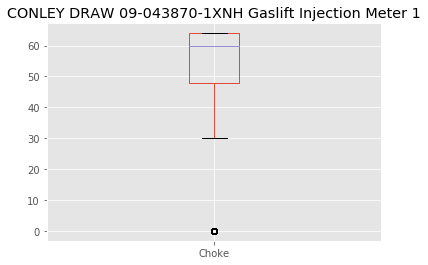

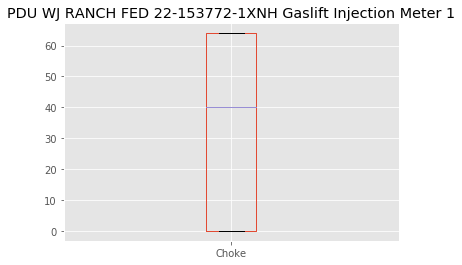

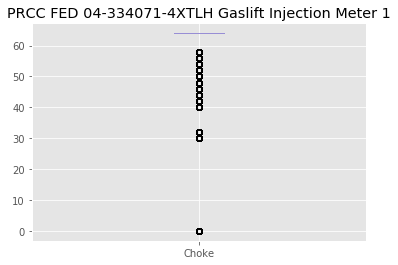

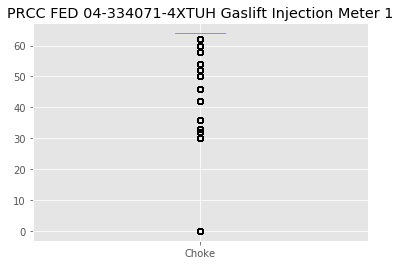

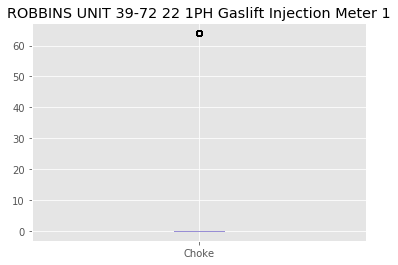

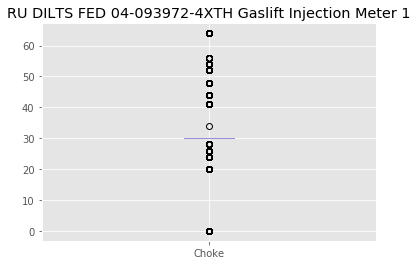

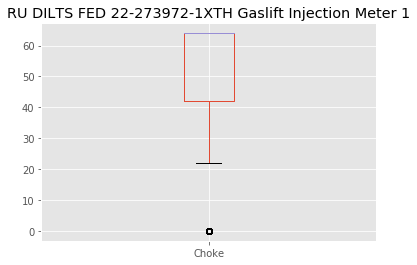

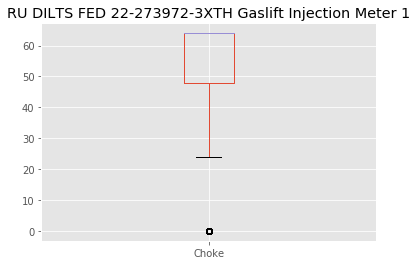

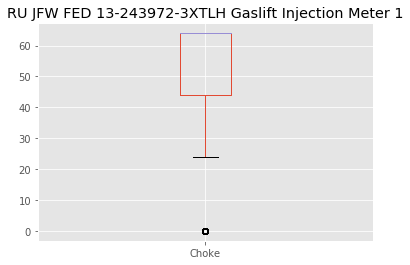

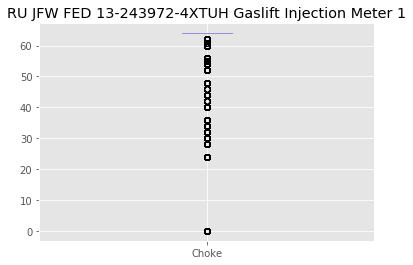

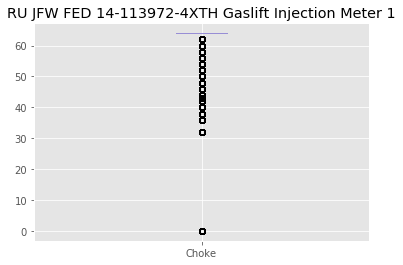

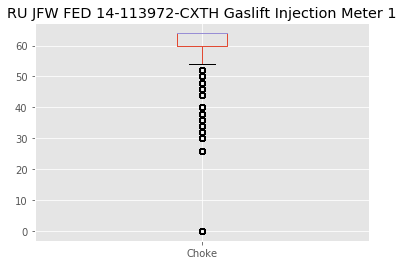

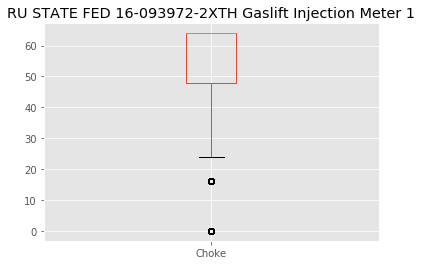

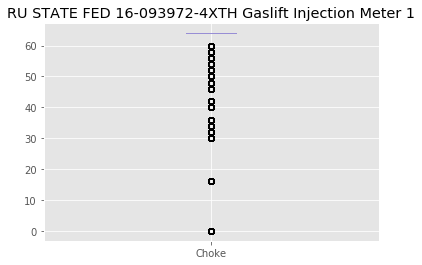

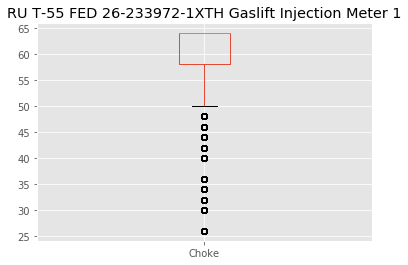

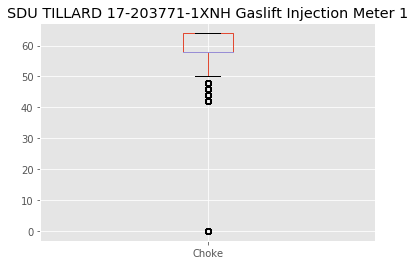

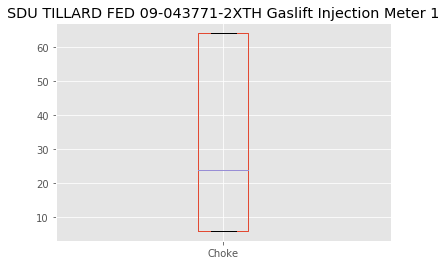

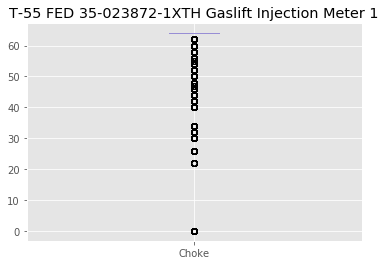

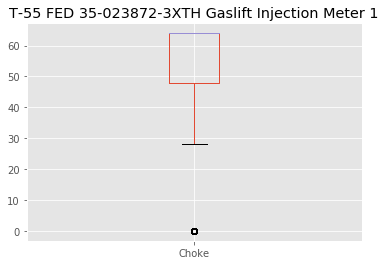

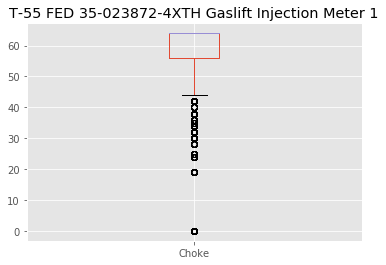

In [65]:
#box plot for each well, for a chosen column
for key in data_frame_list:
    data_frame_list[key]['Choke'].plot(kind='box', title = key)
    plt.show()

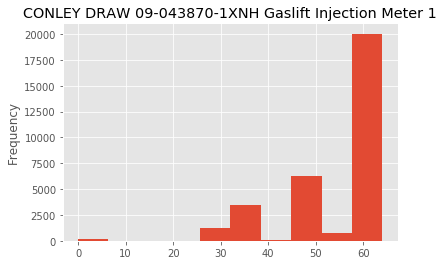

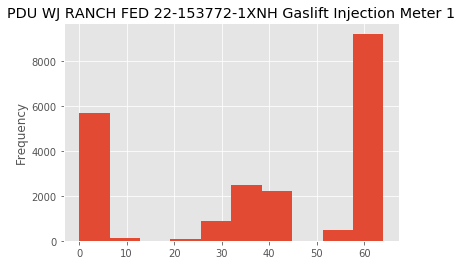

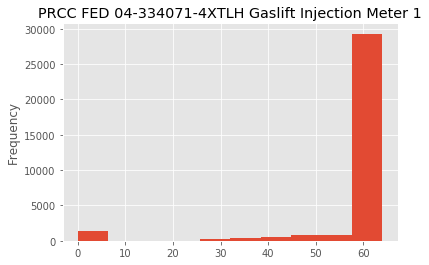

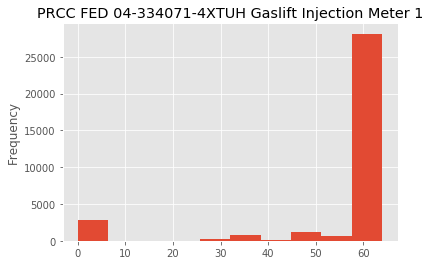

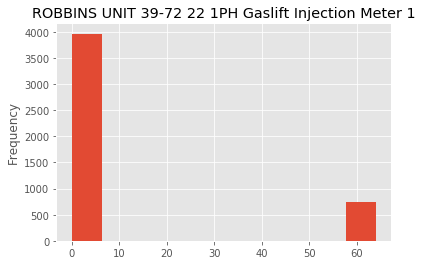

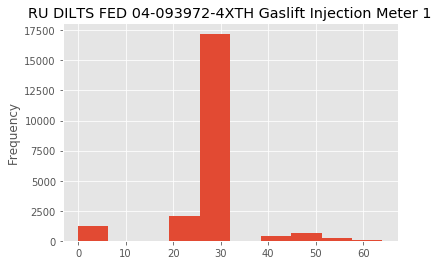

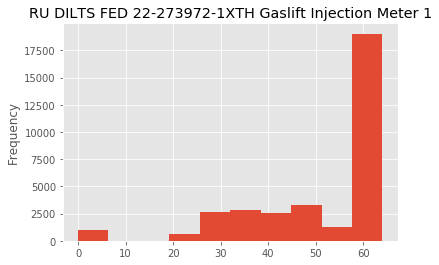

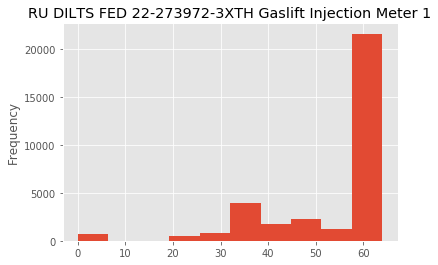

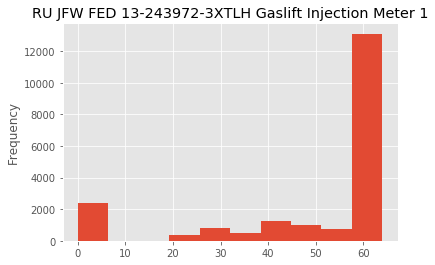

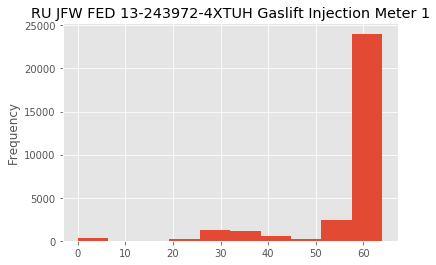

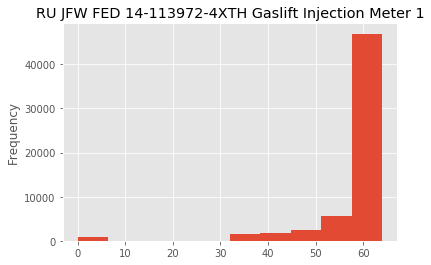

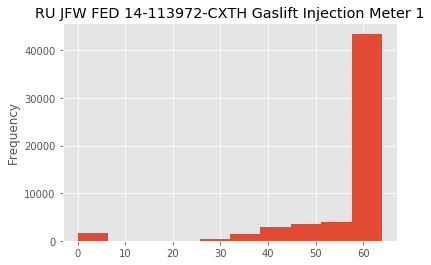

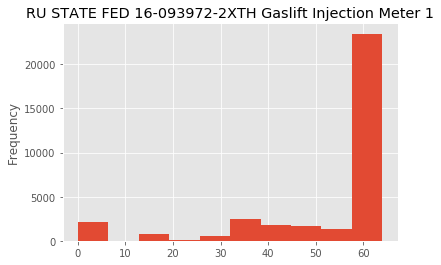

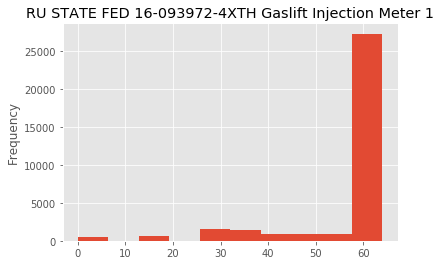

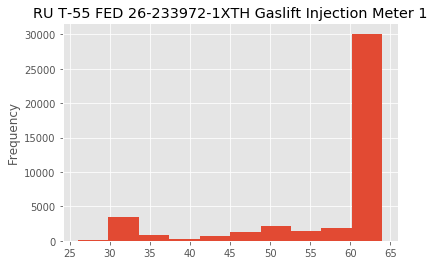

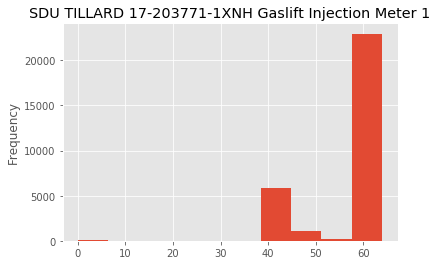

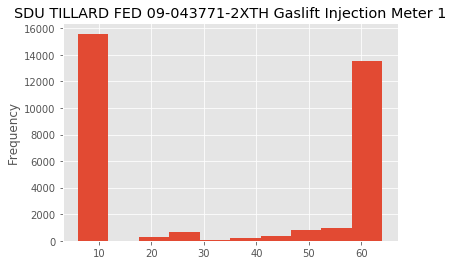

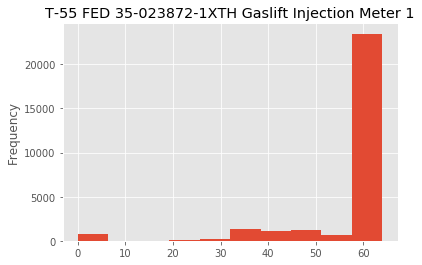

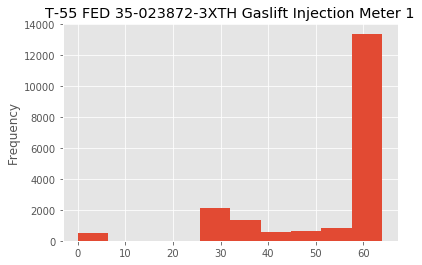

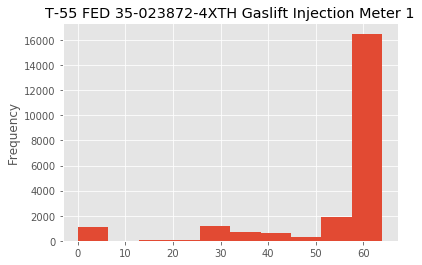

In [66]:
#Histograms across each well, for a chosen column
for key in data_frame_list:
    data_frame_list[key]['Choke'].plot(kind='hist', title = key)
    plt.show()

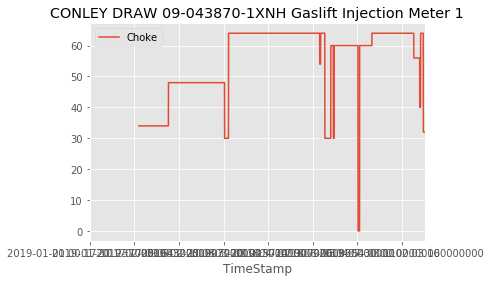

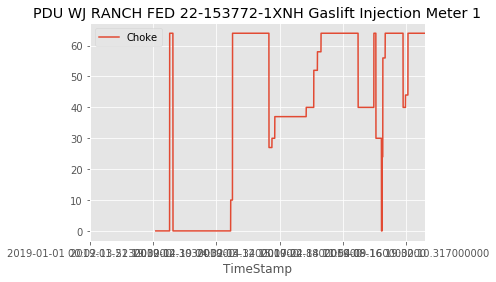

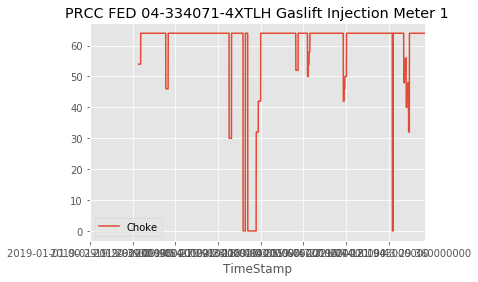

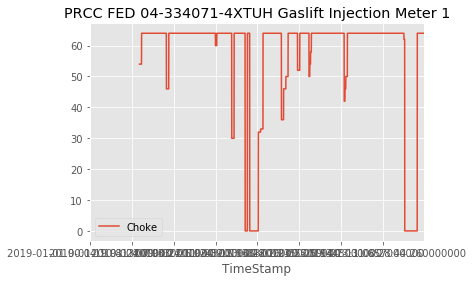

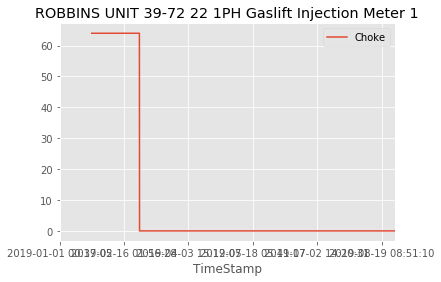

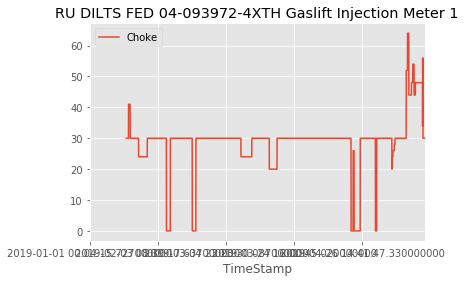

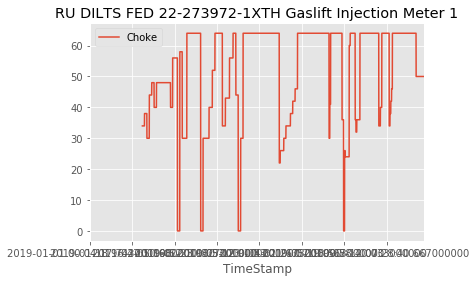

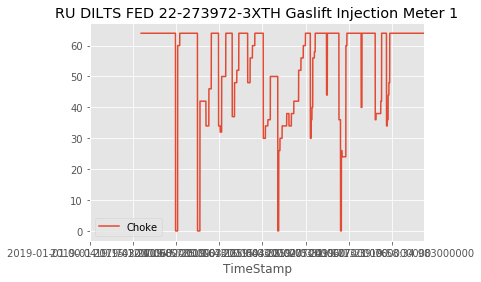

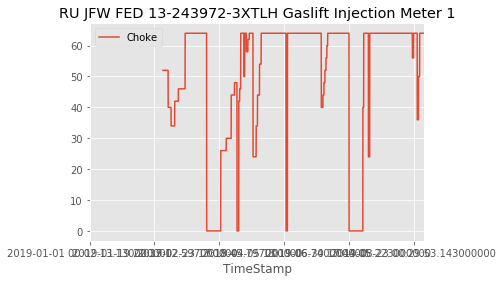

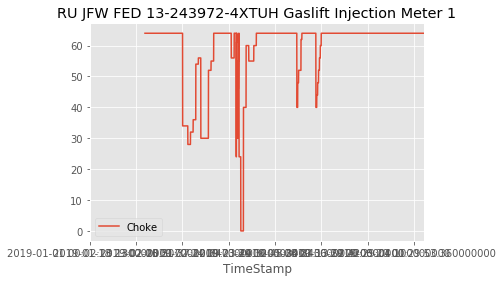

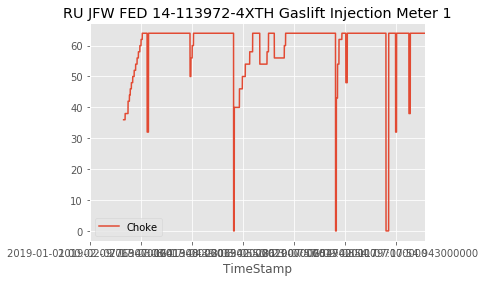

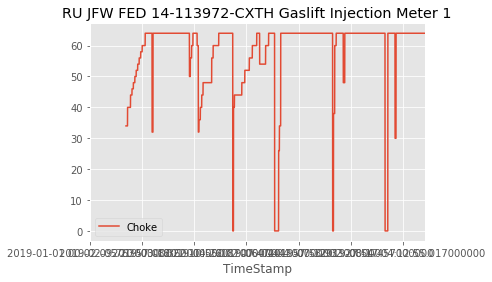

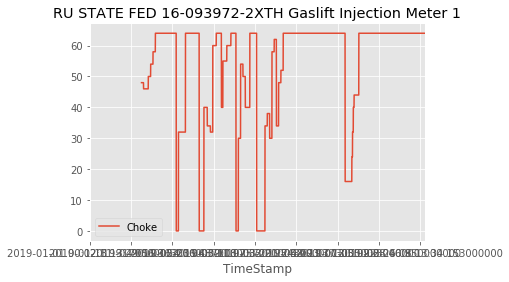

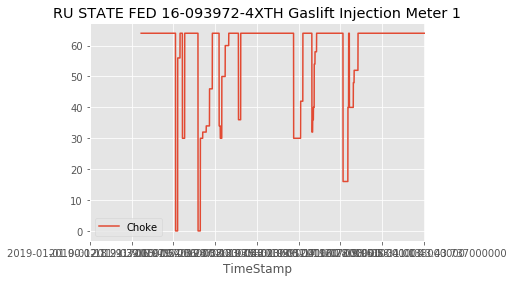

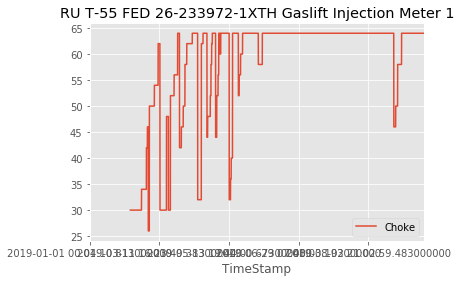

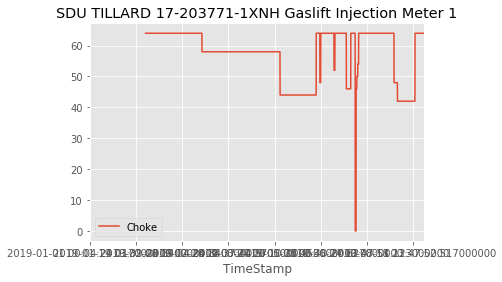

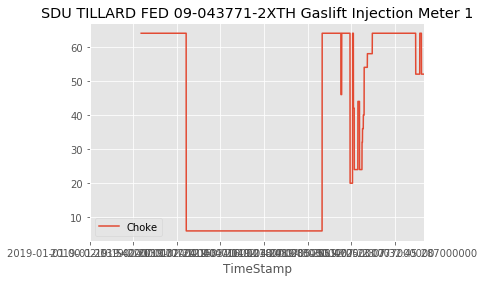

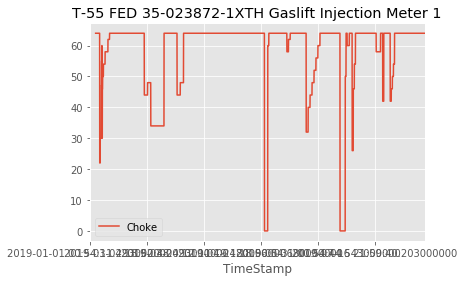

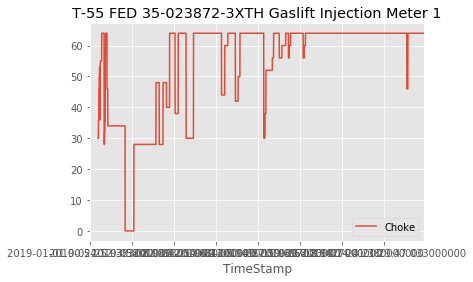

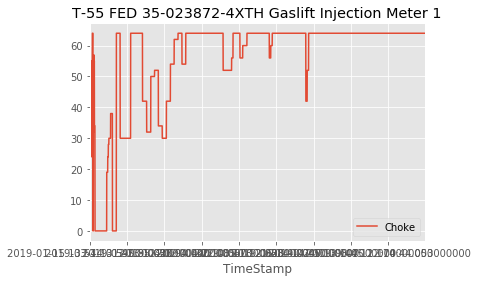

In [67]:
#XY chart for each well, for a chosen column
for key in data_frame_list:
    data_frame_list[key].plot(x='TimeStamp', y='Choke', title = key)
    plt.show()

In [107]:
#removing bad data
# data.loc[data['DownholeIntakePressure'] > 5000, 'DownholeIntakePressure'] = np.nan

DifferentialPressure


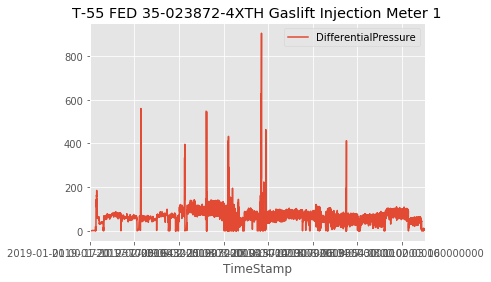

AtmosphericTemperature


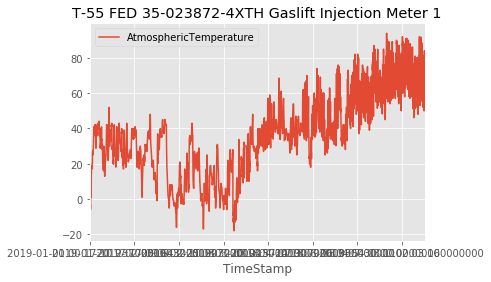

CasingPressure


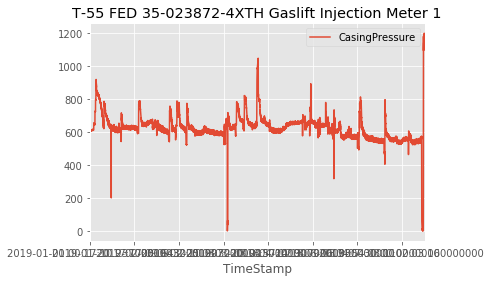

Choke


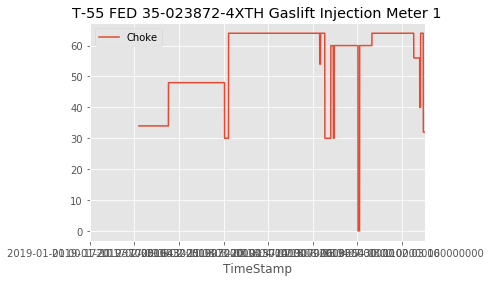

CriticalGasFlowRate


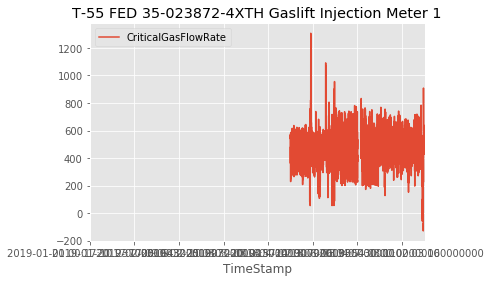

DifferentialPressure


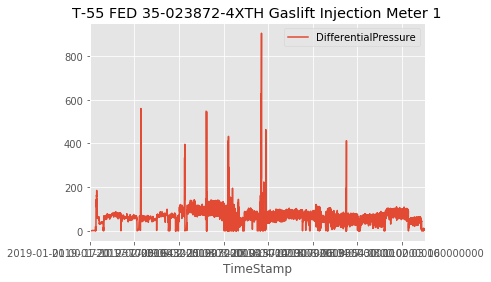

EndofTubingDepth


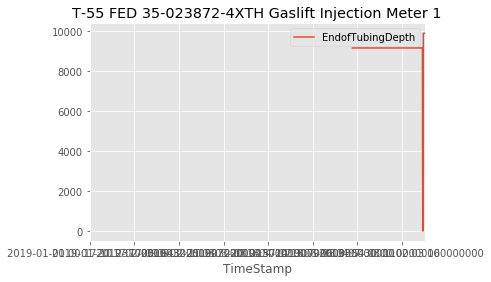

GasLiftValves


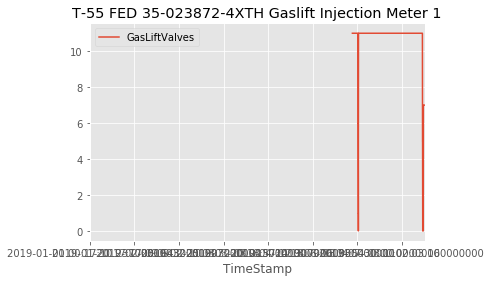

HeaterTreaterRollup


KeyError: 'HeaterTreaterRollup'

In [81]:
#Display charts for each column, for a chosen well
pump_data = data_frame_list["CONLEY DRAW 09-043870-1XNH Gaslift Injection Meter 1"]
columns_to_show = [
    'DifferentialPressure',
    'AtmosphericTemperature',
    'CasingPressure',
    'Choke',
    'CriticalGasFlowRate',
    'DifferentialPressure',
    'EndofTubingDepth',
    'GasLiftValves',
    'HeaterTreaterRollup',
    'HeaterTreaterPressure',
    'InjectionGasRate',
    'InjectionTemp',
    'IsAnnularFlow',
    'PackerDepth',
    'ProdGasMeterRollup',
    'ProdGasMeterFlowRate',
    'SeparatorRollup',
    'SeparatorPressure',
    'StaticPressure',
    'Temperature',
    'TubingID',
    'TubingPressure'
]

for c in columns_to_show:
    print(c)
    pump_data.plot(x='TimeStamp', y=c, title = key)
    plt.show()

In [314]:
# Reports how long a colmn's value has stayed the same, within a tolerance.
# Only tracks a single column.
# Returns a dictionary of critical details.
# is_same (bool): true if the value stayed the same, compared to previous value. Otherwise, False.
# value: the value that was tracked
# lenth: number of intervals the value has been seen
# start: timestamp when the value first occured
# end: timestamp when value was last seen
class FlatnessTracker:
    def __init__(self, timestamp_name, column_name, tolerance):
        self.time_start = np.nan
        self.time_length = 0
        self.time_end = np.nan
        self.timestamp_name = timestamp_name
        self.column_name = column_name
        self.tolerance = tolerance
        self.prev_value = np.nan

    def track(self, row):
        #Record current timestamp as possible start
        if (self.time_length == 0):
            self.time_start = row[self.timestamp_name]
            
        #Record current timestamp as possible end
        self.time_end = row[self.timestamp_name]
        
        #Check if current value is same as past value
        if ((self.prev_value - self.tolerance) <= row[self.column_name]) and (row[self.column_name] <= (self.prev_value + self.tolerance)):
            #Increase counter if value is the same
            self.time_length += 1
            self.prev_value = row[self.column_name]
            #Return that the value is the same (is flat)
            return self.__status(True)
        else:
            #Get status
            status = self.__status(False)
            
            #Reset tracking variables
            self.time_start = np.nan
            self.time_length = 0
            self.time_end = np.nan
            
            #Save current value as prev_value
            self.prev_value = row[self.column_name]
            
            #Return that the value is different (not flat)
            return status
                    
    def __status(self, is_same):
        return {"is_same": is_same,
                "value": self.prev_value,
                "length": self.time_length,
                "start": self.time_start,
                "end": self.time_end}
            
# Example
# ft_casing_pressure = FlatnessTracker("TimeStamp", "CasingPressure", 0.2)
# for index, row in pump_data[500:1000].iterrows():
#     status = ft_casing_pressure.track(row)
#     if (status["is_same"] == False) and (status["length"] > 3):
#         print('Value: {0}, Length: {1}, Start:{2}, End:{3}'.format(status["value"], status["length"], status["start"], status["end"]))
    


In [440]:
# Uses the "FlatnessTracker" class to track multiple columns
class FlatnessTrackers:
    def __init__(self):
        self.trackers = {}
        self.events = {}
        self.min_length = {}
    
    def add(self, column_name, tolerance, min_length):
        self.trackers[column_name] = FlatnessTracker("TimeStamp", column_name, tolerance)
        self.events[column_name] = []
        self.min_length[column_name] = min_length

    def track(self, row):
        for column_name, ft in self.trackers.items():
            status = ft.track(row)
            if (status["is_same"] == False) and (status["length"] >= self.min_length[column_name]):
                self.events[column_name].append(status)

    def print_events(self):
        for column_name, events in self.events.items():
            print(column_name, len(events))
            for s in events:
                print('Value: {0:0.3f}, Length: {1}, Start:{2}, End:{3}'.format(s["value"], s["length"], s["start"], s["end"]))
 

# Example
# ft = FlatnessTrackers()
# ft.add('DifferentialPressure', 0.2, 100)
# ft.add('Choke', 0.2, 500)
# for index, row in pump_data.iterrows(): 
#     ft.track(row)
# ft.print_events()

DifferentialPressure 5
Value: 1.182, Length: 643, Start:2019-01-01 00:22:10.450000000, End:2019-01-04 23:37:10.487000000
Value: 8.370, Length: 104, Start:2019-01-22 06:17:09.607000000, End:2019-01-22 19:42:09.933000000
Value: 0.000, Length: 154, Start:2019-02-28 22:12:03.147000000, End:2019-03-01 10:57:03.233000000
Value: 0.390, Length: 109, Start:2019-03-14 23:07:47.427000000, End:2019-03-15 23:50:03.720000000
Value: 0.000, Length: 180, Start:2019-08-22 08:17:03.130000000, End:2019-08-30 09:32:03.230000000


In [402]:
#Create tracker                
ft = FlatnessTrackers()
ft.add('DifferentialPressure', 0.2, 100)
ft.add('AtmosphericTemperature', 0.01, 50)
ft.add('CasingPressure', 10.0, 500)
ft.add('Choke', 0.2, 500)
        #ft.add('CriticalGasFlowRate', 0.2, 100)
ft.add('DifferentialPressure', 0.2, 100)
ft.add('EndofTubingDepth', 0.2, 5)
ft.add('GasLiftValves', 0.2, 10)
        #ft.add('HeaterTreaterRollup', 0.2, 10)
ft.add('HeaterTreaterPressure', 0.2, 100)
ft.add('InjectionGasRate', 1.0, 40)
ft.add('InjectionTemp', 0.1, 30)
        #ft.add('IsAnnularFlow', 0.2, 10)
ft.add('PackerDepth', 0.2, 10)
         #ft.add('ProdGasMeterRollup', 0.2, 10)
ft.add('ProdGasMeterFlowRate', 5.0, 30)
        #ft.add('SeparatorRollup', 0.2, 10)
        #ft.add('SeparatorPressure', 0.2, 10)
ft.add('StaticPressure', 1.0, 200)
ft.add('Temperature', 0.1, 30)
ft.add('TubingID', 0.2, 10)
ft.add('TubingPressure', 1.0, 40)

#Submit all rows to tracker all rows of data
for index, row in pump_data.iterrows(): 
    ft.track(row)

#Display results
ft.print_events()


DifferentialPressure 5
Value: 1.182, Length: 643, Start:2019-01-01 00:22:10.450000000, End:2019-01-04 23:37:10.487000000
Value: 8.370, Length: 104, Start:2019-01-22 06:17:09.607000000, End:2019-01-22 19:42:09.933000000
Value: 0.000, Length: 154, Start:2019-02-28 22:12:03.147000000, End:2019-03-01 10:57:03.233000000
Value: 0.390, Length: 109, Start:2019-03-14 23:07:47.427000000, End:2019-03-15 23:50:03.720000000
Value: 0.000, Length: 180, Start:2019-08-22 08:17:03.130000000, End:2019-08-30 09:32:03.230000000
AtmosphericTemperature 17
Value: 24.080, Length: 53, Start:2019-01-24 22:42:09.993000000, End:2019-01-25 03:07:10.487000000
Value: 21.920, Length: 53, Start:2019-01-28 15:42:09.247000000, End:2019-01-28 20:07:09.747000000
Value: 35.960, Length: 65, Start:2019-02-01 00:42:09.503000000, End:2019-02-01 06:07:10.377000000
Value: 42.080, Length: 88, Start:2019-02-02 21:42:09.767000000, End:2019-02-03 05:07:10.327000000
Value: -2.020, Length: 64, Start:2019-02-06 11:42:10.020000000, End:2

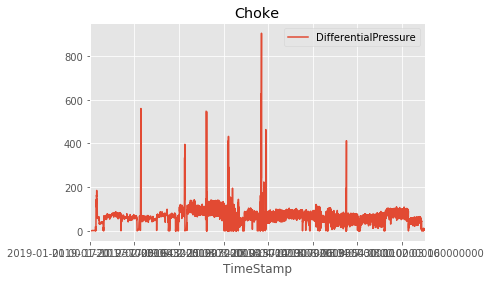

In [405]:
pump_data.plot(x='TimeStamp', y='DifferentialPressure', title = key)
plt.show()

In [435]:
# Reports when a value exceeds a specified standard deviation
class VarianceTracker:
    def __init__(self, timestamp_name, column_name):
        self.timestamp_name = timestamp_name
        self.column_name = column_name
        self.count = 0
        self.mean = 0.0
        self.m2 = 0.0
        self.variance = 0.0

    def track(self, row):
        x = row[self.column_name]
        self._update(x)
        
        return self.variance

    def _update(self, x):
        self.count += 1
        delta = (x - self.mean)
        self.mean += delta/self.count
        self.m2 += delta * (x - self.mean)
        
        if self.count < 2:
            self.variance =  np.nan
        else:
            self.variance = self.m2 / (self.count - 1)
            

#Create tracker
vt = VarianceTracker("TimeStamp", "DifferentialPressure")

vt._update(5.0)
vt._update(4.0)
vt._update(6.0)
vt._update(4.0)
vt._update(6.0)

print (vt.mean)
print (vt.variance)

# #Submit all rows to tracker all rows of data
# for index, row in pump_data[500:510].iterrows():
#     var = vt.track(row)
#     print(var)
    


5.0
1.0


In [442]:
# Tracker ideas
# - Out of range (we know what valid values are)